<a href="https://colab.research.google.com/github/marianvinas/DS-Unit-2-Applied-Modeling/blob/master/Marian_Vinas_LS_DS_234_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Lambda School Data Science

*Unit 2, Sprint 3, Module 4*

---

# Model Interpretation

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Continue to iterate on your project: data cleaning, exploratory visualization, feature engineering, modeling.
- [ ] Make at least 1 partial dependence plot to explain your model.
- [ ] Make at least 1 Shapley force plot to explain an individual prediction.
- [ ] **Share at least 1 visualization (of any type) on Slack!**

If you aren't ready to make these plots with your own dataset, you can practice these objectives with any dataset you've worked with previously. Example solutions are available for Partial Dependence Plots with the Tanzania Waterpumps dataset, and Shapley force plots with the Titanic dataset. (These datasets are available in the data directory of this repository.)

Please be aware that **multi-class classification** will result in multiple Partial Dependence Plots (one for each class), and multiple sets of Shapley Values (one for each class).

## Stretch Goals

#### Partial Dependence Plots
- [ ] Make multiple PDPs with 1 feature in isolation.
- [ ] Make multiple PDPs with 2 features in interaction. 
- [ ] Use Plotly to make a 3D PDP.
- [ ] Make PDPs with categorical feature(s). Use Ordinal Encoder, outside of a pipeline, to encode your data first. If there is a natural ordering, then take the time to encode it that way, instead of random integers. Then use the encoded data with pdpbox. Get readable category names on your plot, instead of integer category codes.

#### Shap Values
- [ ] Make Shapley force plots to explain at least 4 individual predictions.
    - If your project is Binary Classification, you can do a True Positive, True Negative, False Positive, False Negative.
    - If your project is Regression, you can do a high prediction with low error, a low prediction with low error, a high prediction with high error, and a low prediction with high error.
- [ ] Use Shapley values to display verbal explanations of individual predictions.
- [ ] Use the SHAP library for other visualization types.

The [SHAP repo](https://github.com/slundberg/shap) has examples for many visualization types, including:

- Force Plot, individual predictions
- Force Plot, multiple predictions
- Dependence Plot
- Summary Plot
- Summary Plot, Bar
- Interaction Values
- Decision Plots

We just did the first type during the lesson. The [Kaggle microcourse](https://www.kaggle.com/dansbecker/advanced-uses-of-shap-values) shows two more. Experiment and see what you can learn!

### Links

#### Partial Dependence Plots
- [Kaggle / Dan Becker: Machine Learning Explainability — Partial Dependence Plots](https://www.kaggle.com/dansbecker/partial-plots)
- [Christoph Molnar: Interpretable Machine Learning — Partial Dependence Plots](https://christophm.github.io/interpretable-ml-book/pdp.html) + [animated explanation](https://twitter.com/ChristophMolnar/status/1066398522608635904)
- [pdpbox repo](https://github.com/SauceCat/PDPbox) & [docs](https://pdpbox.readthedocs.io/en/latest/)
- [Plotly: 3D PDP example](https://plot.ly/scikit-learn/plot-partial-dependence/#partial-dependence-of-house-value-on-median-age-and-average-occupancy)

#### Shapley Values
- [Kaggle / Dan Becker: Machine Learning Explainability — SHAP Values](https://www.kaggle.com/learn/machine-learning-explainability)
- [Christoph Molnar: Interpretable Machine Learning — Shapley Values](https://christophm.github.io/interpretable-ml-book/shapley.html)
- [SHAP repo](https://github.com/slundberg/shap) & [docs](https://shap.readthedocs.io/en/latest/)

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://query.data.world/s/4bmd5zk5xyaeuvzdeqbd754m3lqg3l'
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pdpbox
    !pip install shap

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='xgboost')

In [258]:
import pandas as pd
pd.options.display.max_columns = None
import pandas as pd
df = pd.read_csv('https://query.data.world/s/4bmd5zk5xyaeuvzdeqbd754m3lqg3l')

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [259]:
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


df = df.dropna(subset=['BedroomAbvGr'])
df['Great'] = df['BedroomAbvGr'] >= 4

cardinality = df.select_dtypes(exclude='number').nunique()

high_cardinality_feat = cardinality[cardinality > 20].index.tolist()
df = df.drop(columns = high_cardinality_feat)
df = df.fillna('Missing')

train = df[df['YrSold'] <= 2016]
val = df[df['YrSold'] == 2007]
test = df[df['YrSold'] <= 2008]

target = 'Great'
features = train.columns.drop([target, 'YrSold'])
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

#pipeline = make_pipeline(
    #ce.ordinal.OrdinalEncoder(),
    #DecisionTreeClassifier(max_depth=5)
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train, y_train)
print(f'Validation accuracy: {pipeline.score(X_val, y_val)}')


Validation accuracy: 1.0


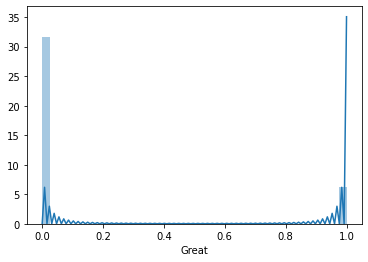

In [260]:
%matplotlib inline
import seaborn as sns
sns.distplot(y_train);

### Fit Linear Regression model

In [261]:
import category_encoders as ce
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr = make_pipeline(
    ce.TargetEncoder(),  
    LinearRegression()
)

lr.fit(X_train, y_train)
print('Linear Regression R^2', lr.score(X_val, y_val))

Linear Regression R^2 0.6867240176669466


### Explaining Linear Regression

In [262]:
coefficients = lr.named_steps['linearregression'].coef_
pd.Series(coefficients, features)

Id               1.512114e-05
MSSubClass       1.228129e-03
MSZoning        -1.552038e-02
LotFrontage      2.978744e-01
LotArea         -5.385770e-07
                     ...     
MiscVal         -1.921583e-05
MoSold           1.508836e-03
SaleType        -2.190964e-01
SaleCondition    2.097969e-01
SalePrice        6.739436e-07
Length: 79, dtype: float64

### Fit Gradient Boosting model


In [263]:
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

gb = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBRegressor(n_estimators=200, objective='reg:squarederror', n_jobs=-1)
)

gb.fit(X_train, y_train)
y_pred = gb.predict(X_val)
print('Gradient Boosting R^2', r2_score(y_val, y_pred))

Gradient Boosting R^2 0.999999995082342


### Partial Dependence Plots with 1 feature

In [0]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 70

In [0]:
from pdpbox.pdp import pdp_isolate, pdp_plot

In [0]:
feature = 'BedroomAbvGr'

isolated = pdp_isolate(
    model=gb,
    dataset=X_val,
    model_features=X_val.columns,
    feature=feature
)

In [267]:
y_train.mean()

0.16575342465753426

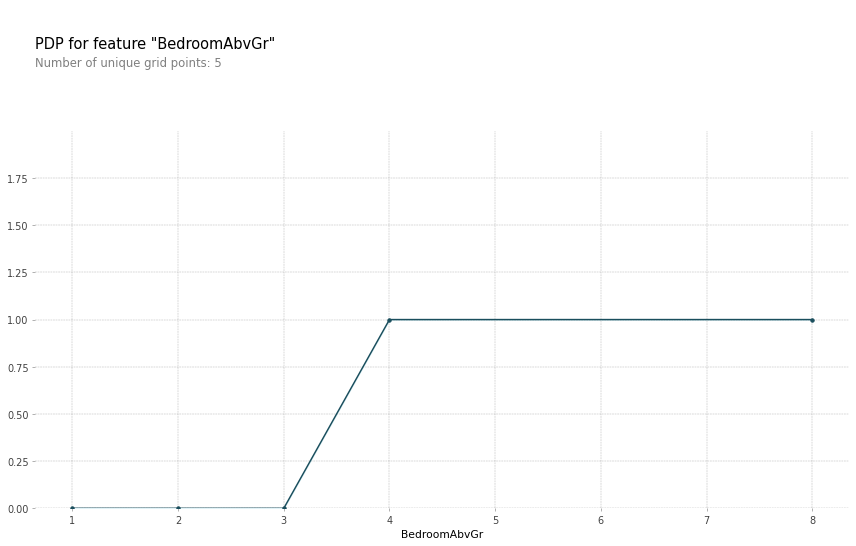

In [268]:
pdp_plot(isolated, feature_name=feature);

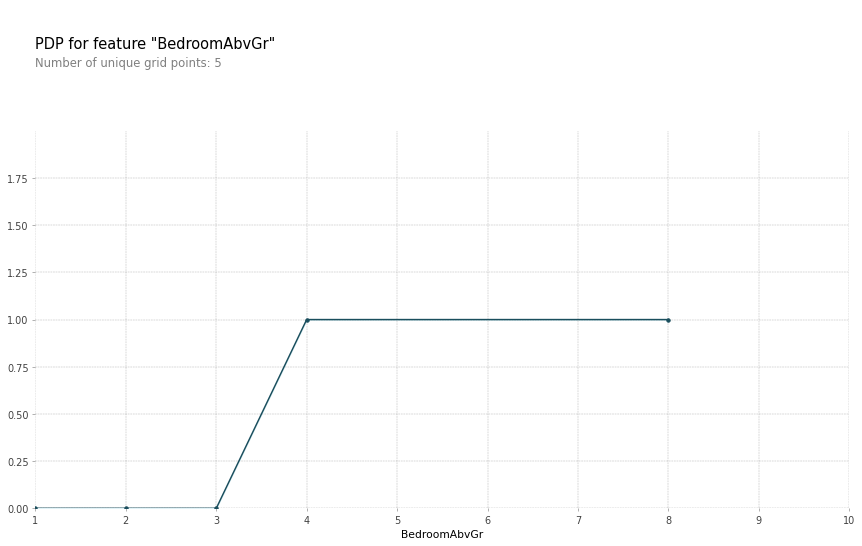

In [269]:
pdp_plot(isolated, feature_name=feature)
plt.xlim((1, 10));

In [270]:
X_val.shape

(329, 79)

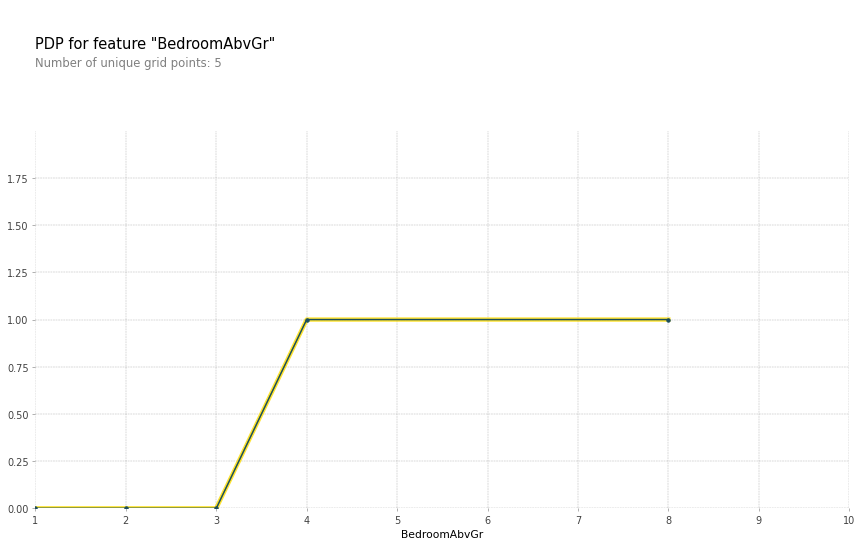

In [271]:
pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=0.05)
plt.xlim((1, 10));

### Partial Dependence Plots with 2 features

In [0]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

In [0]:
features = ['LotArea', 'GarageCars']

interact = pdp_interact(
    model=gb,
    dataset=X_val,
    model_features=X_val.columns,
    features=features
)

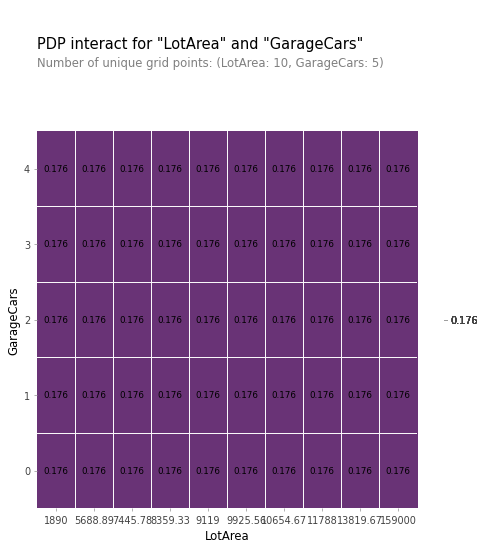

In [274]:
pdp_interact_plot(interact, plot_type='grid', feature_names=features);

###3D with Plotly

In [0]:
pdp = interact.pdp.pivot_table(
    values='preds', 
    columns=features[0], 
    index=features[1]
)[::-1]

In [276]:
pdp

LotArea,1890.000000,5688.888889,7445.777778,8359.333333,9119.000000,9925.555556,10654.666667,11788.000000,13819.666667,159000.000000
GarageCars,,,,,,,,,,
4.0,0.176291,0.176291,0.176291,0.176291,0.176291,0.176291,0.176291,0.176291,0.176291,0.176291
3.0,0.176291,0.176291,0.176291,0.176291,0.176291,0.176291,0.176291,0.176291,0.176291,0.176291
2.0,0.176291,0.176291,0.176291,0.176291,0.176291,0.176291,0.176291,0.176291,0.176291,0.176291
1.0,0.176291,0.176291,0.176291,0.176291,0.176291,0.176291,0.176291,0.176291,0.176291,0.176291
0.0,0.176291,0.176291,0.176291,0.176291,0.176291,0.176291,0.176291,0.176291,0.176291,0.176291


In [277]:
import plotly.graph_objs as go

surface = go.Surface(
    x=pdp.columns, 
    y=pdp.index, 
    z=pdp.values
)


layout = go.Layout(
    scene=dict(
        xaxis=dict(title=features[0]), 
        yaxis=dict(title=features[1]), 
        zaxis=dict(title=target)
    )
)

fig = go.Figure(surface, layout)
fig.show()

###Fit a model

In [278]:
import category_encoders as ce
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier



target = 'Great'
features = df.columns.drop(['Great', 'SaleCondition'])

X = df[features]
y = df[target]

# Use Ordinal Encoder, outside of a pipeline
encoder = ce.OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_encoded, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [279]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Great
0,1,60,RL,65,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,False
1,2,20,RL,80,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,False
2,3,60,RL,68,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,False
3,4,70,RL,60,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,False
4,5,60,RL,84,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62,7917,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,175000,False
1456,1457,20,RL,85,13175,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,Missing,MnPrv,Missing,0,2,2010,WD,Normal,210000,False
1457,1458,70,RL,66,9042,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,Missing,GdPrv,Shed,2500,5,2010,WD,Normal,266500,True
1458,1459,20,RL,68,9717,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0,TA,TA,

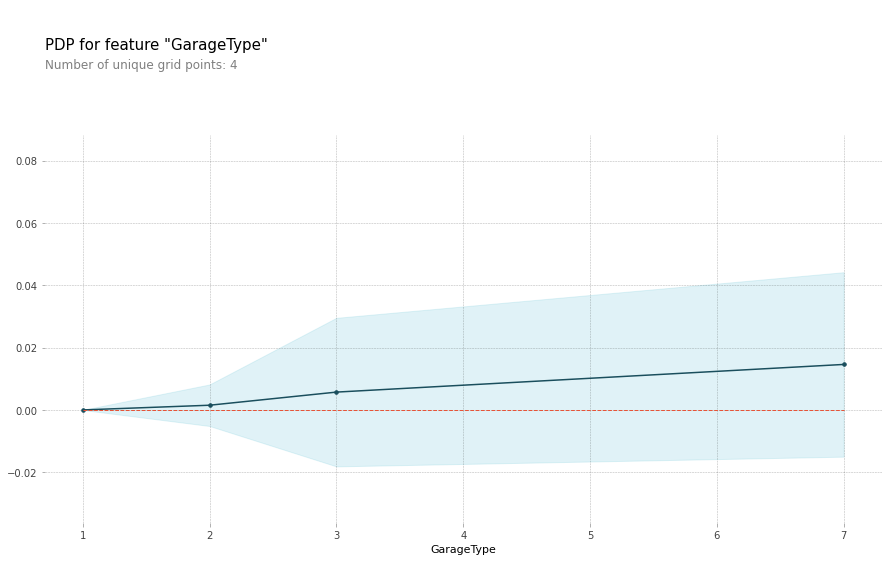

In [280]:
# Use Pdpbox
%matplotlib inline
import matplotlib.pyplot as plt
from pdpbox import pdp
feature = 'GarageType'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_encoded, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

In [281]:
encoder.mapping

[{'col': 'MSZoning', 'data_type': dtype('O'), 'mapping': RL         1
  RM         2
  C (all)    3
  FV         4
  RH         5
  NaN       -2
  dtype: int64},
 {'col': 'LotFrontage', 'data_type': dtype('O'), 'mapping': 65.0       1
  80.0       2
  68.0       3
  60.0       4
  84.0       5
          ... 
  152.0    108
  124.0    109
  153.0    110
  46.0     111
  NaN       -2
  Length: 112, dtype: int64},
 {'col': 'Street', 'data_type': dtype('O'), 'mapping': Pave    1
  Grvl    2
  NaN    -2
  dtype: int64},
 {'col': 'Alley', 'data_type': dtype('O'), 'mapping': Missing    1
  Grvl       2
  Pave       3
  NaN       -2
  dtype: int64},
 {'col': 'LotShape', 'data_type': dtype('O'), 'mapping': Reg    1
  IR1    2
  IR2    3
  IR3    4
  NaN   -2
  dtype: int64},
 {'col': 'LandContour', 'data_type': dtype('O'), 'mapping': Lvl    1
  Bnk    2
  Low    3
  HLS    4
  NaN   -2
  dtype: int64},
 {'col': 'Utilities', 'data_type': dtype('O'), 'mapping': AllPub    1
  NoSeWa    2
  NaN    

In [282]:
df['HouseStyle']

0       2Story
1       1Story
2       2Story
3       2Story
4       2Story
         ...  
1455    2Story
1456    1Story
1457    2Story
1458    1Story
1459    1Story
Name: HouseStyle, Length: 1460, dtype: object

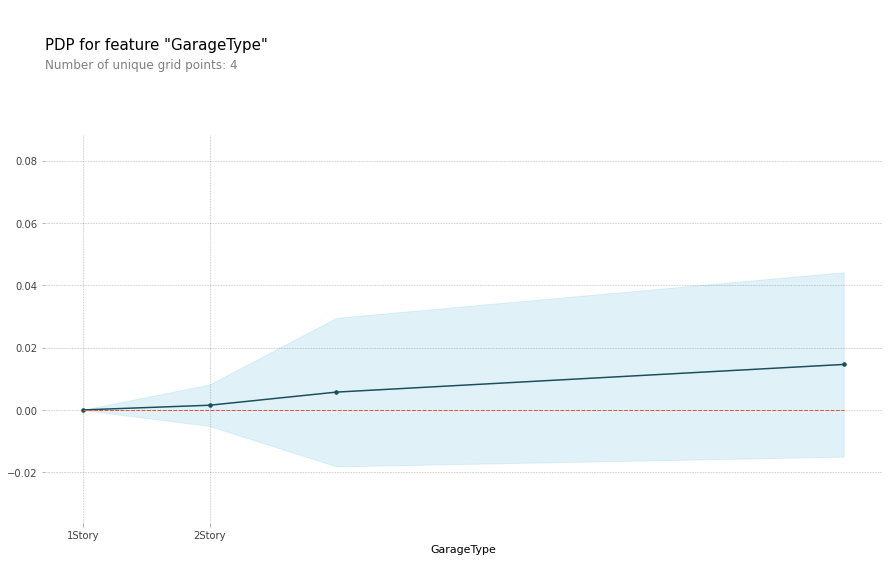

In [283]:
pdp.pdp_plot(pdp_dist, feature)

# Manually change the xticks labels
plt.xticks([1, 2], ['1Story', '2Story']);

In [0]:
feature = 'HouseStyle'
for item in encoder.mapping:
    if item['col'] == feature:
        feature_mapping = item['mapping']
        
feature_mapping = feature_mapping[feature_mapping.index.dropna()]
category_names = feature_mapping.index.tolist()
category_codes = feature_mapping.values.tolist()

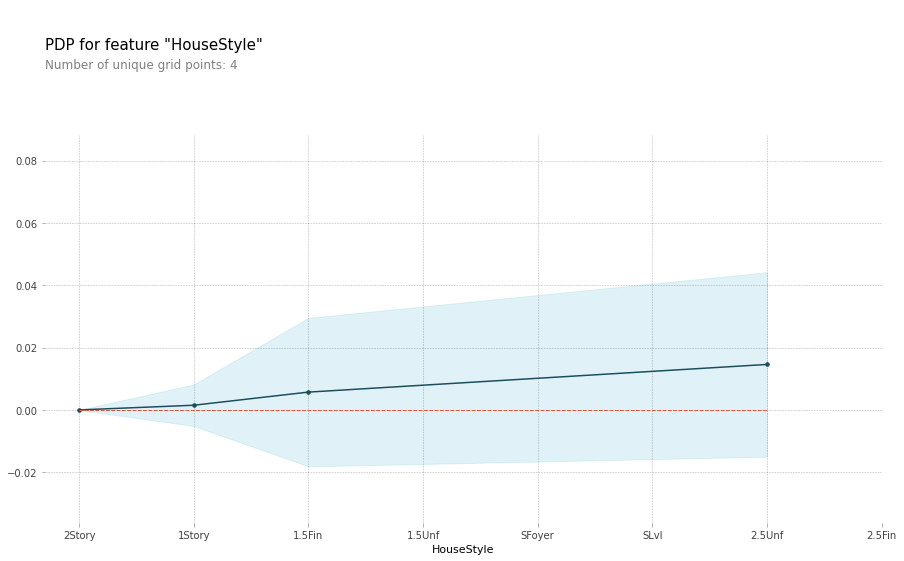

In [285]:
pdp.pdp_plot(pdp_dist, feature)

# Automatically change the xticks labels
plt.xticks(category_codes, category_names);

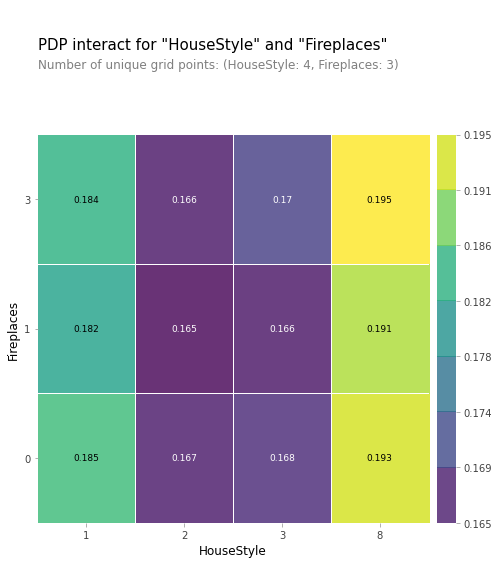

In [286]:
features = ['HouseStyle', 'Fireplaces']

interaction = pdp_interact(
    model=model, 
    dataset=X_encoded, 
    model_features=X_encoded.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

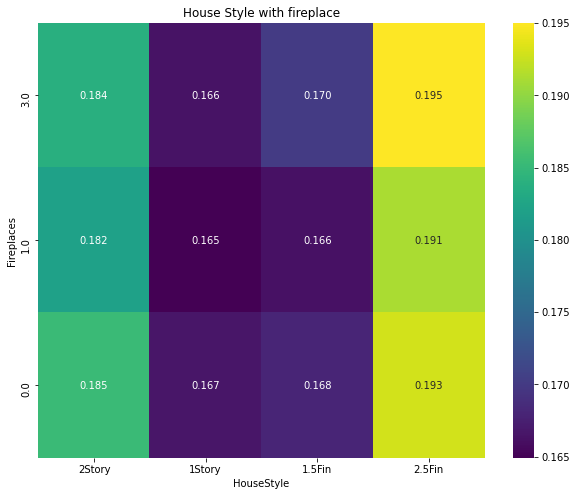

In [287]:
pdp = interaction.pdp.pivot_table(
    values='preds', 
    columns=features[0], # First feature on x axis
    index=features[1]    # Next feature on y axis
)[::-1]  # Reverse the index order so y axis is ascending

pdp = pdp.rename(columns=dict(zip(category_codes, category_names)))
plt.figure(figsize=(10,8))
sns.heatmap(pdp, annot=True, fmt='.3f', cmap='viridis')
plt.title('House Style with fireplace');

###Shapley Values

In [317]:
import pandas as pd
import numpy as np


df = pd.read_csv('https://query.data.world/s/4bmd5zk5xyaeuvzdeqbd754m3lqg3l')

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


df = df.dropna(subset=['BedroomAbvGr'])
df['Great'] = df['BedroomAbvGr'] >= 4

cardinality = df.select_dtypes(exclude='number').nunique()

high_cardinality_feat = cardinality[cardinality > 20].index.tolist()
df = df.drop(columns = high_cardinality_feat)
df = df.fillna('Missing')

train = df[df['YrSold'] <= 2016]

test = df[df['YrSold'] <= 2008]




In [0]:
# Assign to X, y
target = 'SalePrice'
features = ['GarageCars', 'Fireplaces', 'FullBath']
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

In [320]:
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

param_distributions = { 
    'n_estimators': randint(50, 500), 
    'max_depth': [5, 10, 15, 20, None], 
    'max_features': uniform(0, 1), 
}

search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42), 
    param_distributions=param_distributions, 
    n_iter=5, 
    cv=2, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1, 
    random_state=42
)

search.fit(X_train, y_train);

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.7s finished


In [321]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', -search.best_score_)
model = search.best_estimator_

Best hyperparameters {'max_depth': None, 'max_features': 0.596850157946487, 'n_estimators': 171}
Cross-validation MAE 34016.78986147415


In [322]:
X_test

,GarageCars,Fireplaces,FullBath
0,2,0,2
1,2,1,2
2,2,1,2
3,3,1,1
4,3,1,2
...,...,...,...
1449,0,0,1
1452,2,0,1
1453,0,0,1
1455,2,1,2


In [323]:
# Get an individual observation to explain.
# For example, the 0th row from the test set.
row = X_test.iloc[[0]]
row

,GarageCars,Fireplaces,FullBath
0,2,0,2


In [324]:
# What was the actual sale's price?
y_test.iloc[0]

208500

In [325]:
# What does the model predict for this house sale?
model.predict(row)

array([177494.71854684])

### Look at a Shapley Values Force Plot

In [0]:
import shap

In [327]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)
shap_values

array([[  2660.24197597, -26696.74585931,  20567.39261763]])

In [328]:
explainer.expected_value

array([180963.82981255])

In [329]:
y_train.mean()

180921.19589041095

In [330]:
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=row
)

In [331]:
shap_values.sum()

-3469.111265704174

In [332]:
explainer.expected_value + shap_values.sum()

array([177494.71854684])

In [333]:
explainer.expected_value

array([180963.82981255])

In [334]:
X_train.shape

(1460, 3)

In [335]:
row

,GarageCars,Fireplaces,FullBath
0,2,0,2


In [336]:
model.predict(row)

array([177494.71854684])

### Define the predict function

In [339]:
def predict(GarageCars, Fireplaces, FullBath):

    # Make dataframe from the inputs
    df = pd.DataFrame(
        data=[[GarageCars, Fireplaces, FullBath]], 
        columns=['GarageCars', 'Fireplaces', 'FullBath']
    )

    # Get the model's prediction
    pred = model.predict(df)[0]

    # Calculate shap values
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(df)

    # Get series with shap values, feature names, & feature values
    feature_names = df.columns
    feature_values = df.values[0]
    shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))

    # Print results
    result = f'${pred:,.0f} estimated sale price. \n\n'
    result += f'Starting from baseline of ${explainer.expected_value} \n'
    result += shaps.to_string()
    print(result)


    # Show shapley values force plot
    shap.initjs()
    return shap.force_plot(
        base_value=explainer.expected_value, 
        shap_values=shap_values, 
        features=df
    )

predict(3, 2, 2)

$401,573 estimated sale price. 

Starting from baseline of $[180963.82981255] 
(GarageCars, 3)    110828.055179
(Fireplaces, 2)     83754.166661
(FullBath, 2)       26027.229385


In [340]:
#For 2 Garage cars
predict(2, 2, 2)

$237,754 estimated sale price. 

Starting from baseline of $[180963.82981255] 
(GarageCars, 2)   -14419.120385
(Fireplaces, 2)    49018.141468
(FullBath, 2)      22191.420115


In [341]:
#For 1 fireplace
predict(2, 1, 2)

$206,655 estimated sale price. 

Starting from baseline of $[180963.82981255] 
(GarageCars, 2)    -7553.819203
(Fireplaces, 1)    15205.089117
(FullBath, 2)      18040.159488


In [343]:
#For 3 fullbath
predict(3, 2, 3)

$499,511 estimated sale price. 

Starting from baseline of $[180963.82981255] 
(GarageCars, 3)    129684.495034
(Fireplaces, 2)     78303.609346
(FullBath, 3)      110559.374933
